In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import cv2
import PIL

# Getting Data from googlepis

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# by data_dir i specified download location

228813984/228813984 [==============================] - 6s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib # this module will be show the path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/4632757134_40156d7d5b.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2490828907_5094017933_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7153497513_076486e26b_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/5598591979_ed9af1b3e9_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/4575406391_7a62c5f90f_n.jpg')]

In [6]:
# counting image number
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


# Visualize images

In [7]:
daisy = list(data_dir.glob('daisy/*'))[:5]

In [8]:
daisy

[PosixPath('datasets/flower_photos/daisy/3957488431_52a447c0e8_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/2045022175_ad087f5f60_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2476937534_21b285aa46_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6480809573_76a0074b69_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/2408024540_37f0be7cc0_n.jpg')]

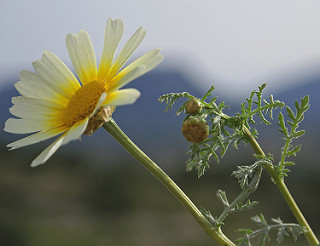

In [9]:
#visualize image using PIL
PIL.Image.open(str(daisy[2]))

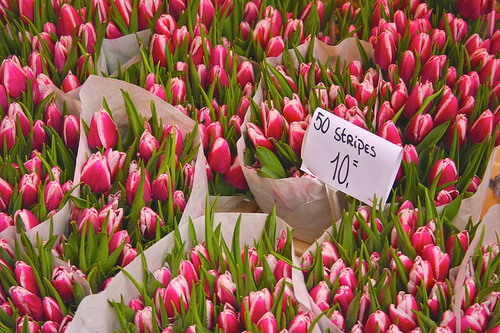

In [10]:
tulips = list(data_dir.glob('tulips/*'))[:5]
PIL.Image.open(str(tulips[2]))

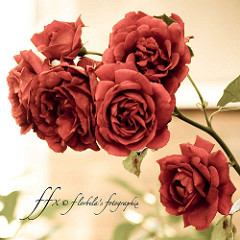

In [11]:
roses = list(data_dir.glob('roses/*'))[:5]
PIL.Image.open(str(roses[2]))

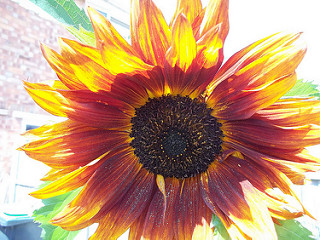

In [12]:
sunflowers = list(data_dir.glob('sunflowers/*'))[:5]
PIL.Image.open(str(sunflowers[2]))

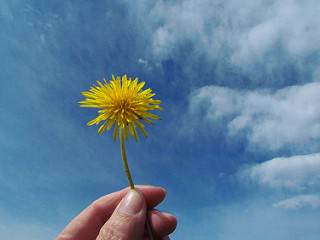

In [13]:
dandelion = list(data_dir.glob('dandelion/*'))[:5]
PIL.Image.open(str(dandelion[2]))

Read flowers from directory into numpy using opencv

In [14]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict

{'roses': [PosixPath('datasets/flower_photos/roses/8032328803_30afac8b07_m.jpg'),
  PosixPath('datasets/flower_photos/roses/4735314389_94fe1b2a9f_n.jpg'),
  PosixPath('datasets/flower_photos/roses/3026375835_a20ecdd140_m.jpg'),
  PosixPath('datasets/flower_photos/roses/16339359979_6d742660b8_n.jpg'),
  PosixPath('datasets/flower_photos/roses/3921794817_276eb4386b.jpg'),
  PosixPath('datasets/flower_photos/roses/1831404161_d2df86fd70.jpg'),
  PosixPath('datasets/flower_photos/roses/1757822526_fe30b9b3ca_m.jpg'),
  PosixPath('datasets/flower_photos/roses/9216324117_5fa1e2bc25_n.jpg'),
  PosixPath('datasets/flower_photos/roses/5223191368_01aedb6547_n.jpg'),
  PosixPath('datasets/flower_photos/roses/4505921907_21c8002fde.jpg'),
  PosixPath('datasets/flower_photos/roses/850416050_31b3ff7086.jpg'),
  PosixPath('datasets/flower_photos/roses/5234278003_d827fcd73b_m.jpg'),
  PosixPath('datasets/flower_photos/roses/3145692843_d46ba4703c.jpg'),
  PosixPath('datasets/flower_photos/roses/7304710956

In [16]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [17]:
img = cv2.imread(str(flowers_images_dict['roses'][5]))

In [18]:
img

array([[[ 4, 15,  5],
        [10, 21, 11],
        [ 5, 16,  6],
        ...,
        [ 1,  6,  4],
        [ 0,  5,  3],
        [ 0,  4,  2]],

       [[ 5, 18,  4],
        [ 3, 16,  2],
        [ 0, 10,  0],
        ...,
        [ 0,  7,  0],
        [ 2,  9,  2],
        [ 3, 10,  3]],

       [[ 1, 11,  5],
        [ 7, 14,  9],
        [ 9, 16, 11],
        ...,
        [ 1,  8,  5],
        [ 1,  6,  4],
        [ 1,  6,  4]],

       ...,

       [[ 5, 19,  8],
        [ 2, 13,  3],
        [ 3, 14,  6],
        ...,
        [15, 35, 16],
        [12, 32, 13],
        [16, 36, 17]],

       [[ 9, 21,  9],
        [ 4, 15,  5],
        [ 4, 15,  5],
        ...,
        [13, 41, 18],
        [12, 39, 19],
        [14, 41, 21]],

       [[ 3, 15,  3],
        [ 2, 14,  2],
        [ 3, 15,  3],
        ...,
        [13, 43, 18],
        [15, 45, 20],
        [15, 44, 21]]], dtype=uint8)

In [19]:
img.shape

(333, 500, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

# Resizing image

In [21]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
xtrian,xtest,ytrain,ytest = train_test_split(X,y,random_state=0)

In [24]:
# scaling datase
xtrian_scale = xtrian / 255
xtest_scale = xtest / 255

# Building CNN and train it

In [25]:
from tensorflow.keras import layers, Sequential
import tensorflow as tf

num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(3, padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(xtrian_scale, ytrain, epochs=15)


Epoch 1/15
86/86 [==============================] - 29s 325ms/step - loss: 1.2944 - accuracy: 0.4462
Epoch 2/15
86/86 [==============================] - 27s 318ms/step - loss: 1.0071 - accuracy: 0.5938
Epoch 3/15
86/86 [==============================] - 27s 311ms/step - loss: 0.8643 - accuracy: 0.6588
Epoch 4/15
86/86 [==============================] - 27s 317ms/step - loss: 0.7587 - accuracy: 0.7042
Epoch 5/15
86/86 [==============================] - 27s 316ms/step - loss: 0.6843 - accuracy: 0.7344
Epoch 6/15
86/86 [==============================] - 27s 313ms/step - loss: 0.5735 - accuracy: 0.7805
Epoch 7/15
86/86 [==============================] - 27s 314ms/step - loss: 0.4755 - accuracy: 0.8314
Epoch 8/15
86/86 [==============================] - 27s 313ms/step - loss: 0.4067 - accuracy: 0.8456
Epoch 9/15
86/86 [==============================] - 27s 308ms/step - loss: 0.3009 - accuracy: 0.8888
Epoch 10/15
86/86 [==============================] - 27s 315ms/step - loss: 0.2020 - accura

# evalute model 

In [26]:
model.evaluate(xtest_scale,ytest)

29/29 [==============================] - 3s 109ms/step - loss: 1.5515 - accuracy: 0.6917


[1.5515179634094238, 0.6917211413383484]

you see we have got very high accuracy which is 99% but our model has performed on test data with 69% sccuracy.
This means our model has overfitting let's fix this issue!

# Improve test accuracy using Data Augmentation

In [32]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

# Original image

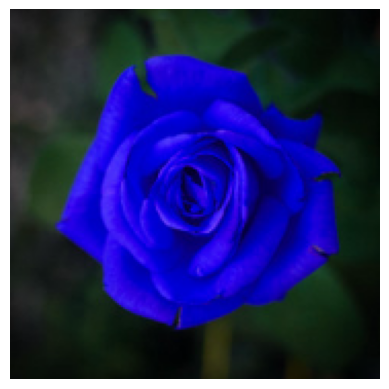

In [33]:
plt.axis('off')
plt.imshow(X[0])

# Newly generated training sample using data augmentation

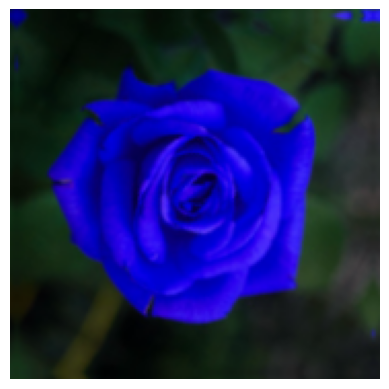

In [34]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [36]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(xtrian_scale, ytrain, epochs=15) 

Epoch 1/15
86/86 [==============================] - 55s 606ms/step - loss: 1.3690 - accuracy: 0.4073
Epoch 2/15
86/86 [==============================] - 52s 606ms/step - loss: 1.0972 - accuracy: 0.5494
Epoch 3/15
86/86 [==============================] - 52s 601ms/step - loss: 0.9867 - accuracy: 0.6166
Epoch 4/15
86/86 [==============================] - 52s 600ms/step - loss: 0.9119 - accuracy: 0.6479
Epoch 5/15
86/86 [==============================] - 51s 594ms/step - loss: 0.8709 - accuracy: 0.6559
Epoch 6/15
86/86 [==============================] - 52s 608ms/step - loss: 0.8231 - accuracy: 0.6795
Epoch 7/15
86/86 [==============================] - 52s 603ms/step - loss: 0.7955 - accuracy: 0.6948
Epoch 8/15
86/86 [==============================] - 53s 612ms/step - loss: 0.7606 - accuracy: 0.7188
Epoch 9/15
86/86 [==============================] - 64s 751ms/step - loss: 0.7358 - accuracy: 0.7195
Epoch 10/15
86/86 [==============================] - 53s 612ms/step - loss: 0.6758 - accura

In [37]:
model.evaluate(xtest_scale,ytest)

29/29 [==============================] - 5s 149ms/step - loss: 0.8432 - accuracy: 0.7092


[0.8432319164276123, 0.7091503143310547]

You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 70%


# if have much time then you can increase epocs number and this may will help you to increase more accuracy

# Make prediction

In [39]:
predictions = model.predict(xtest_scale)
predictions

29/29 [==============================] - 5s 154ms/step


array([[ 1.9689022 , -1.440566  ,  0.8672677 , -3.4178214 ,  0.8916671 ],
       [ 3.7951028 , -1.3901991 , -1.6594986 , -3.7182257 ,  2.7762783 ],
       [ 0.07236081,  2.5866268 ,  5.3816376 , -3.133427  ,  0.3131434 ],
       ...,
       [-2.390125  ,  0.14488763,  2.3929749 ,  8.083223  , -1.5338649 ],
       [ 1.8204187 ,  1.0589365 ,  3.8175402 , -5.113116  ,  0.7169611 ],
       [-2.827368  ,  0.98508507,  1.1041217 ,  6.9725847 , -1.0747187 ]],
      dtype=float32)

In [55]:
score = tf.nn.softmax(predictions[3])

In [56]:
np.argmax(score)

4

In [58]:
ytest[3]


4

# Happy Programming